In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn import datasets
%matplotlib inline
plt.style.use('ggplot')

## 1. k-Nearest Neighbours

Like what its name suggest. Determine the class by looking at its neighbour

In [23]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
X_pre = cancer.data
X = StandardScaler().fit_transform(X_pre)

X_train, X_test, y_train, y_test = train_test_split(
    X, cancer.target,stratify=cancer.target, random_state=66)


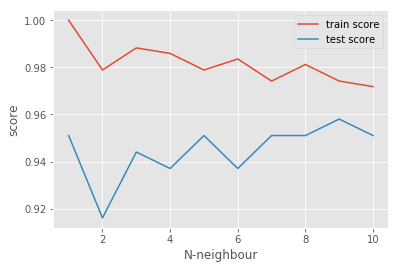

In [24]:
# Having more nieghbour sometimes give lower score
fig, ax = plt.subplots()
tr_score = []
ts_score = []

for i in range(1,11):
    kneigh = KNeighborsClassifier(n_neighbors=i)
    kneigh.fit(X_train,y_train)
    tr_score.append(kneigh.score(X_train,y_train))
    ts_score.append(kneigh.score(X_test,y_test))
    
ax.plot(range(1,11),tr_score,label='train score')
ax.plot(range(1,11),ts_score,label='test score')
ax.set_ylabel('score')
ax.set_xlabel('N-neighbour')
ax.legend()

### Lets try visualise them

Lets choose 'mean radius' and 'mean concave points'

In [25]:
X_train_df = pd.DataFrame(X_train,columns=cancer.feature_names)
# target = pd.Series(list(map(lambda x: cancer.target_names[x],cancer.target)))

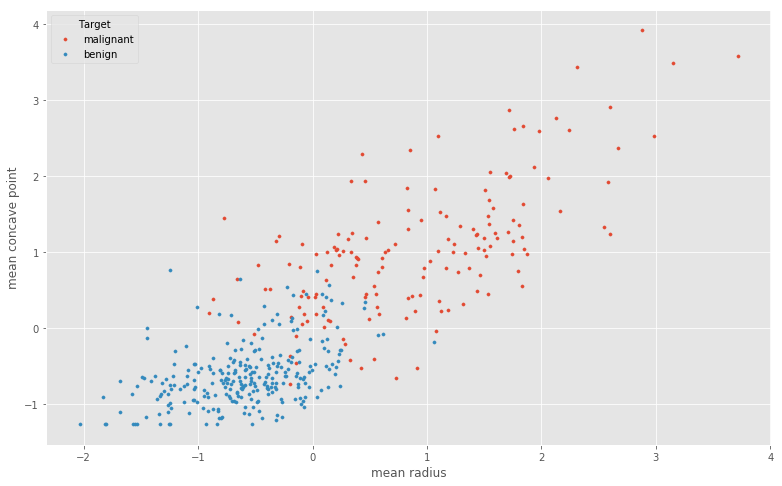

In [26]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(13)

# Matplotlib not as powerful as seaborn. You need a loop and mask to seperately plot them
# so that u can label them correctly
for i in np.unique(cancer.target):
    mask = y_train == i
    x = X_train_df['mean radius'][mask]
    y = X_train_df['mean concave points'][mask]
    ax.scatter(x, y, cmap='jet', s=10, label=cancer.target_names[i])
ax.set_ylabel('mean concave point')
ax.set_xlabel('mean radius')
ax.legend(title='Target')

### Now lets put one test point inside

In [27]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

predicted:  1
actual: 1


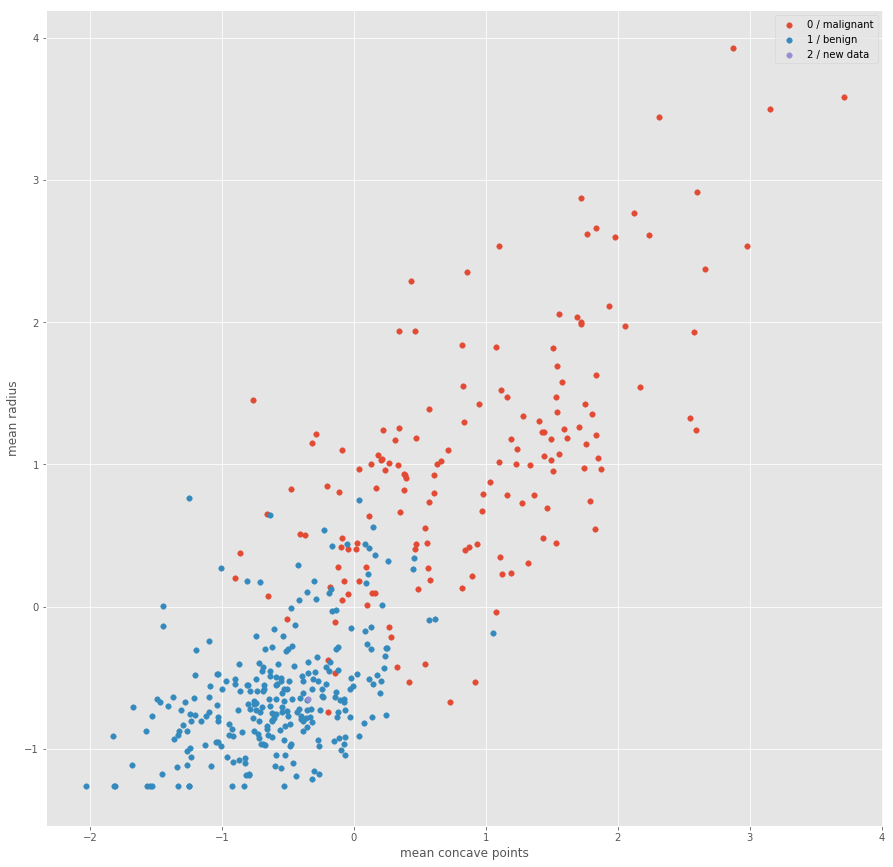

In [34]:
x_one = X_test[0].reshape(1, -1)
y_one = kneigh.predict(x_one)
print('predicted: ',y_one[0])
print('actual:', y_test[0])

y_one[0] = 2

x_one = pd.DataFrame(x_one,columns=cancer.feature_names)
y_one = pd.Series(y_one,name='Target')
new_X_df = pd.concat([X_train_df,x_one])
new_y_df = pd.Series(y_train,name='Target')
new_y_df = pd.concat([new_y_df,y_one])

target_name = np.append(cancer.target_names,'new data')
fig, ax = plt.subplots(figsize=(15,15))

# that purple new data is a bottom. The predicted value is 1/benign.
# It is truely in the blue dot area. Look closely
for i in np.unique(new_y_df):
    mask = new_y_df.values == i
    x = new_X_df['mean radius'][mask]
    y = new_X_df['mean concave points'][mask]
    ax.scatter(x,y,s=30,label='{} / {}'.format(i,target_name[i]))

ax.set_xlabel('mean concave points')
ax.set_ylabel('mean radius')
ax.legend()

In [22]:
def plot_2d_classification(classifier, X, ax=None, eps=None, alpha=1, cm='jet'):
    
    # get eps values automatically from distribution of feature values
    if eps is None:
        eps0 = X[:,0].std() / 2
        eps1 = X[:,1].std() / 2
    else:
        eps0, eps1 = eps

    # if no axes defined, get current axes
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps0, X[:, 0].max() + eps0
    y_min, y_max = X[:, 1].min() - eps1, X[:, 1].max() + eps1
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

### StandardScaler
Standardize features by removing the mean and scaling to unit variance. `StandardScaler` ensure that for each feature the mean is 0 and variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features
### MinMaxScaler
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

`MinMaxScaler` shifts the data such that all features are exactly between 0 and 1. For 2-D data, this means all data is contained within the rectangle created by the x-axis between 0 and 1, and y-axis between 0 and 1.
### RobustScaler
`RobustScaler` works similar to `StandardScaler` in normalizing the statistical properties for each feature, but uses the median and quartiles instead of the mean and variance. So, it ignores data points that are very different from the rest. These "odd" data points are also called outliers, and they can lead to trouble in other scaling methods.

### Normalizer
`Normalizer` rescales each data point such that the feature vector has a Euclidean length of 1 (L2-normal). In other words, it projects a data point on the circle (or sphere, for higher dimensions) with a radius of 1. Every data point is scaled by a different number. This normalization is often used when only the direction of the data matters, not the length of the feature vector.

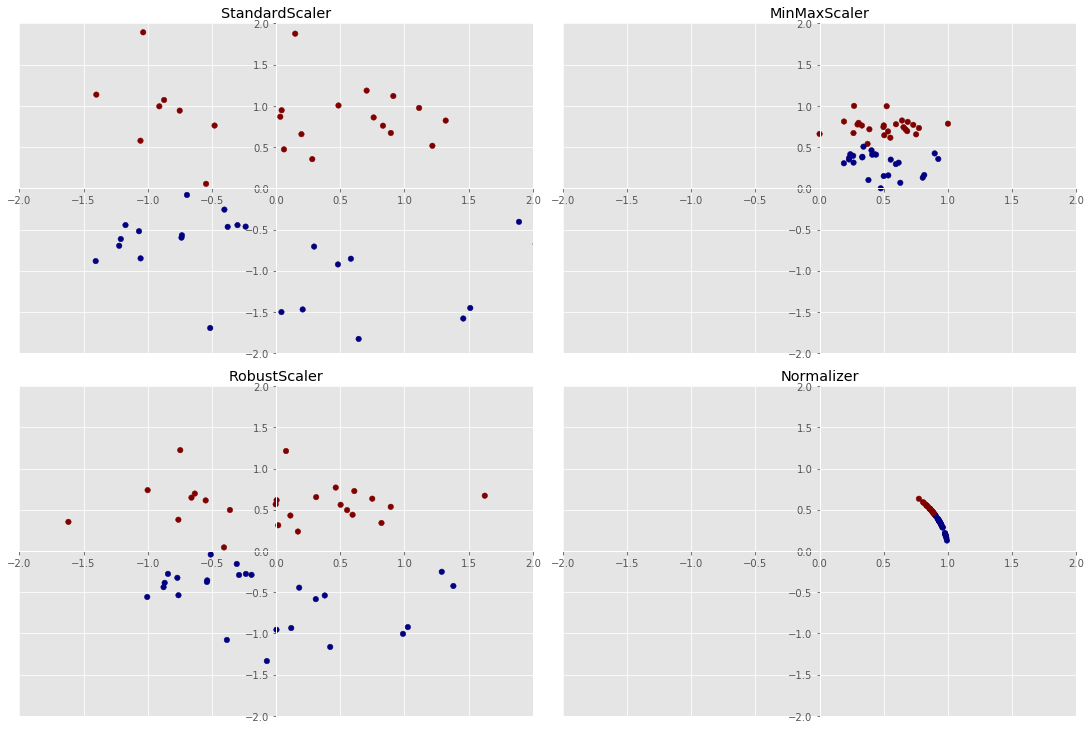

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3
fig = plt.figure(figsize=(30, 15))
other_axes = [plt.subplot2grid((3, 4), (i, j)) for j in range(2, 4) for i in range(2)]
for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap='jet', s=30)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_title(type(scaler).__name__)

plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
plt.show()

## 2.Softmax Regression
Logistic regression uses $\textbf{sigmoid}$ function. Remember sigmoid is a curve in between 0 and 1.
Hence, it can only be use to determine the probability of 2 distinct class

\begin{align}
    S(x) = \frac{1}{e^-x+1} = \frac{e^x}{e^x+1} 
\end{align}

$\textbf{Softmax}$ however uses. It can be used to determine the probability of each 
class seperately

\begin{align}
    p_k = \sigma(s(\textbf{x}))_k = \frac{\text{exp}(s_k(\textbf{x}))}{\sum_{j=1}^{K}\text{exp}(s_j(\textbf{x}))}
\end{align}

Exponential has the properties of maximizing the differences between the values. 
Each value is then being divided by sum of all exponential values

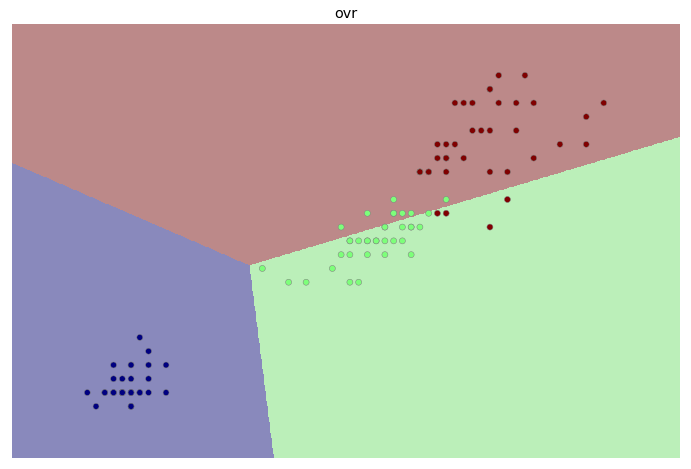

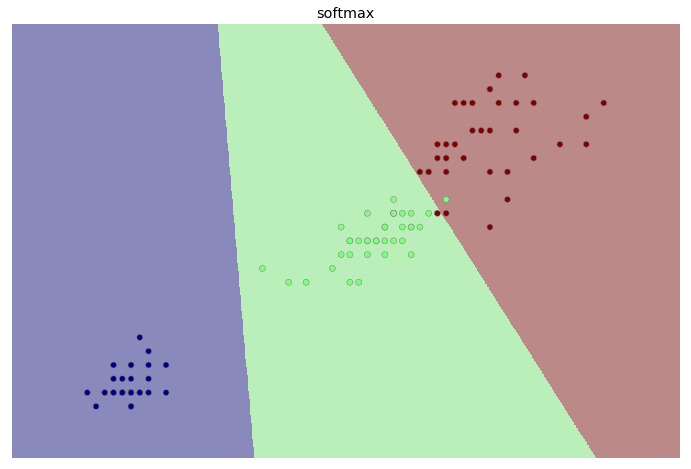

In [44]:
iris = datasets.load_iris()
X = iris.data[:,(2,3)]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=23)
log_ovr = LogisticRegression(multi_class='ovr') #one versus all
log_multi = LogisticRegression(multi_class='multinomial',solver='lbfgs') #Softmax

log_ovr.fit(X_train,y_train)
log_multi.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_train[:,0],
                 X_train[:,1],
                 c=y_train,
                 cmap='jet',
                 edgecolors = 'grey')
ax.set_title('ovr')
plot_2d_classification(log_ovr,X_train,ax=ax,alpha=0.4)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_train[:,0],
                 X_train[:,1],
                 c=y_train,
                 cmap='jet',
                 edgecolors = 'grey')
ax.set_title('softmax')
plot_2d_classification(log_multi,X_train,ax=ax,alpha=0.4)

## 3.Support Vector Machine (SVM)

### Linear SVM Classifcation
![](resources/large-margin-classification.png)
There is a 'longkang'/'street' in between two class. This is called large margin classification. Think of it as having 'safety buffer' for better generalisation to
handle new data that is more ambiguos. The two instances located at the edge of street
are called the support vectors

Linear SVM formula:
\begin{align}
w^T \cdot x + b = w_1 x_1 + \cdots + w_n x_n + b
\end{align}

\begin{align}
    \hat{y} =
    \begin{cases} 
      0 & \text{if } w^T \cdot x + b < 0, \\
      1 & \text{if } w^T \cdot x + b \ge 0 
    \end{cases}
\end{align}

If the results is positive, the predicted class is 1. If its negative, its 0

### Soft Margin Classfication (Regularization)
The 'longkang' can contain certain number of point. This will make the 'longkang' bigger,
and hence gives better generalization.

![](resources/hyperparameter-C.png)

* In SVM function, `c` control level of acceptance. smaller `c`, larger 'longkang'. 
Better generalization. Less prone to error


In [47]:
def plot_svc_decision_boundary(svm_clf, ax, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # only runnable if using SVC and not LinearSVC
    #svs = svm_clf.support_vectors_
    #ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='white', edgecolors='grey')
    
    ax.plot(x0, decision_boundary, "k-", linewidth=2)
    ax.plot(x0, gutter_up, "k--", linewidth=2)
    ax.plot(x0, gutter_down, "k--", linewidth=2)

Train accuracy for c=0.01:  0.908450704225
Test accuracy for c=0.01:  0.909090909091
Train accuracy for c=1:  0.917840375587
Test accuracy for c=1:  0.895104895105


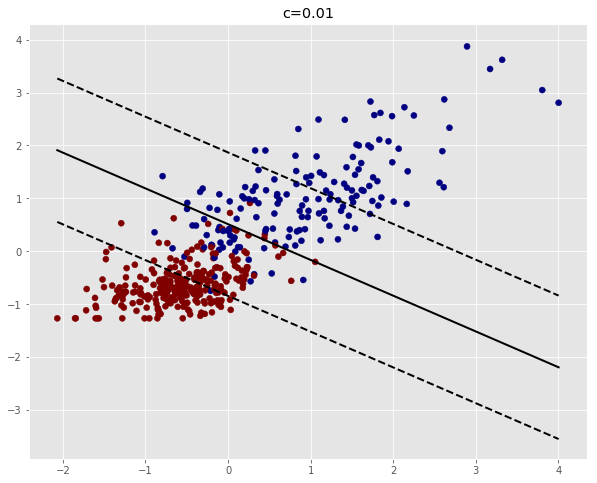

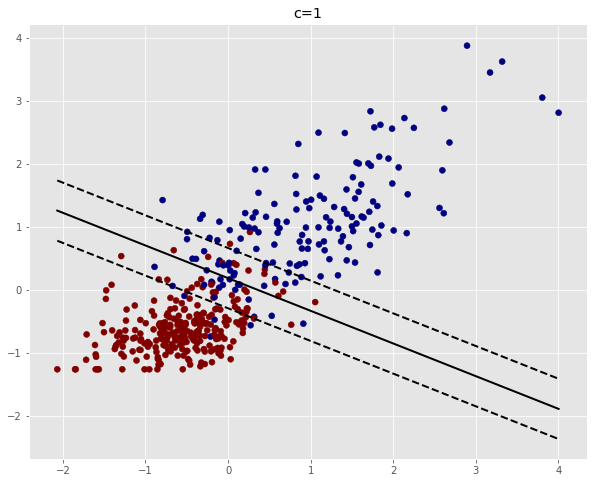

In [96]:
from sklearn.svm import SVC
breast = datasets.load_breast_cancer()
breast.feature_names
X = breast.data[:,(0,7)] # 'mean radius' 'mean concave points'
y = breast.target

for C in [0.01,1]:
    pipe = Pipeline([
        ('scaler',StandardScaler()),
        ('linear_svc',SVC(C=C, kernel='linear'))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)
    pipe.fit(X_train,y_train)
    print("Train accuracy for c={}: ".format(C),pipe.score(X_train, y_train))
    print("Test accuracy for c={}: ".format(C),pipe.score(X_test, y_test))

    X_train = StandardScaler().fit_transform(X_train)

    fig, ax = plt.subplots(figsize=(10,8))
    svc = pipe.steps[1][1]
    plot_svc_decision_boundary(svc,ax,X_train[:,0].min(),X_train[:,0].max())
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='jet')
    ax.set_title('c={}'.format(C))

### Non linear SVM

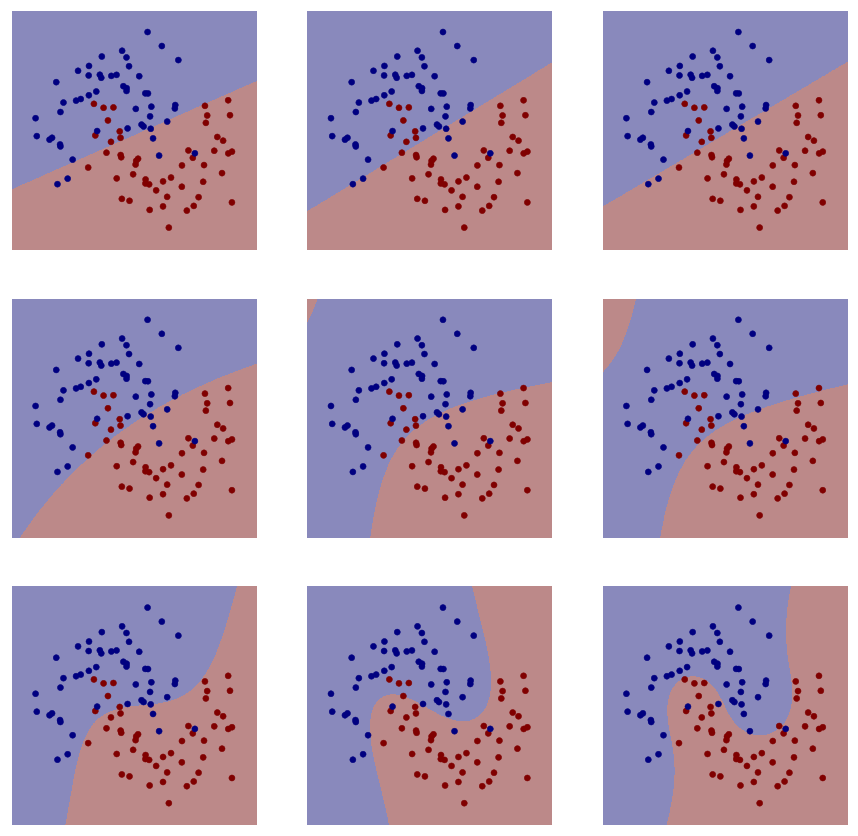

In [98]:
from sklearn.datasets import make_moons
# write your code here
X, y = make_moons(noise=0.3, random_state=0)
fig, axm = plt.subplots(3,3,figsize=(15,15))

for deg in range(1,4):
    for c in range(-1,2):
        polynomial_svm_clf1 = Pipeline([
        #    ("poly_features", PolynomialFeatures(degree=3)), #it creates polynomial outside the svc poly kernel. slow apporach
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(C=10**c, kernel='poly', degree=deg, coef0=1))
            ])
        polynomial_svm_clf1.fit(X, y)
#         print(polynomial_svm_clf1.steps)
        
        X = StandardScaler().fit_transform(X)
        axm[deg-1][c+1].scatter(X[:,0], X[:,1], c=y, cmap='jet')
        plot_2d_classification(polynomial_svm_clf1,X,ax=axm[deg-1][c+1],alpha=0.4)

### SVM Regression
The trick here is to reverse its objective -- instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e. instances off the street). The width of the street is controlled by a hyperparameter $\epsilon$, which is the "margin" of the regressor. The figure on the left shows an example with $\epsilon=1.5$, while the one on the right is with $\epsilon=0.5$. Data points marked with a circle are those that violate the margin (outside the margin).

![](resources/svm-regressor.png)


use `LinearSVR` class from scikit-learn.

In [125]:
def plot_svm_regression(svr,X,y,ax):
    x1s = np.linspace(X.min(),X.max(),100).reshape(100,1)
    y_pred = svr.predict(x1s)
    ax.plot(x1s,y_pred,'k-',linewidth=1, label='y_pred')
    ax.plot(x1s,(y_pred + svr.epsilon), 'k--')
    ax.plot(x1s,(y_pred - svr.epsilon), 'k--')
#     ax.plot(X,y,'bo')
    ax.legend()

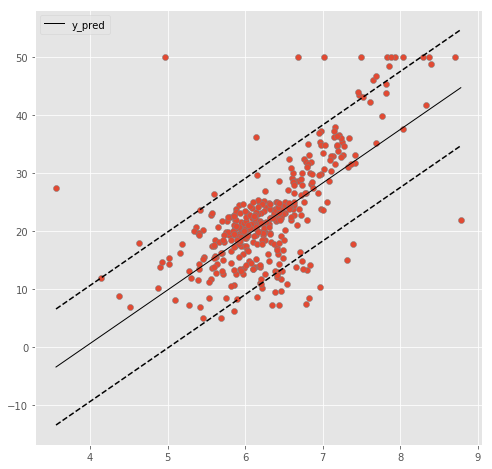

In [130]:
from sklearn.svm import LinearSVR

boston = datasets.load_boston()
X = boston.data[:,5]   # we select feature number 6 'AGE'       
y = boston.target    

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

lin_svr = LinearSVR(epsilon=10, C=100)
lin_svr.fit(X_train,y_train)

fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train,y_train,cmap='jet',edgecolors='grey')

plot_svm_regression(lin_svr,X_train,y_train,ax)

### Non linear SVM Regression
use SVR from scikit-learn library

Training set R^2: 0.49
Test set R^2: 0.44


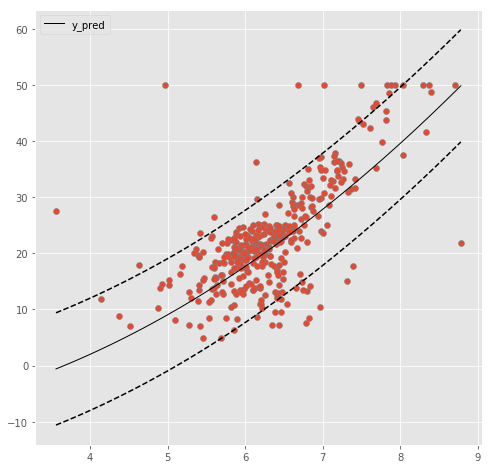

In [134]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=10.0)
svm_poly_reg.fit(X_train, y_train)

fig, axes = plt.subplots(figsize=(8,8))
sc = axes.scatter(X_train, y_train, cmap='jet', edgecolors='grey')
plot_svm_regression(svm_poly_reg, X_train, y_train, axes)

print("Training set R^2: {:.2f}".format(svm_poly_reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(svm_poly_reg.score(X_test, y_test)))

##  4.Decision Tree

Hierarchy of if/else questions and leads to classification of classes

It is also possible to use decision trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target value of the training points in this leaf.

In [137]:
from sklearn.tree import DecisionTreeClassifier

breast = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target, stratify=breast.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


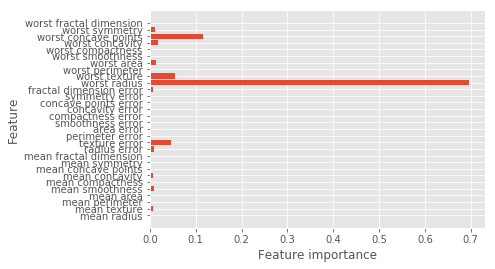

In [140]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

### 5.Decision Tree Regression
Similar to classification, the new test data is classified into one of the class.
The value is then taken from the mean value from that class

Decision tree are no good in predicting 'new' responses outside of what was seen during training data

We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature. Then, we will use two simple models: a DecisionTreeRegressor and LinearRegression, for comparisons. The prices will all be rescaled using a logarithm, so that the relationship is relatively linear. After training the models and making predictions, we apply the exponential map to undo the logarithm transform.

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

ram_price = pd.read_csv('ram_price.csv')

data_train = ram_price[ram_price.date <2000]
data_test = ram_price[ram_price.date >=2000]

# predict prices based on date
X_train = data_train.date[:,np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
lin = LinearRegression().fit(X_train,y_train)

# predict on all data
X_all = ram_price.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = lin.predict(X_all)

#undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

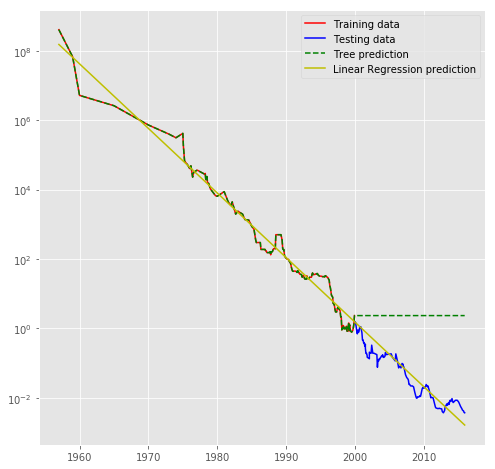

In [151]:
fig, ax = plt.subplots(figsize=(8,8))
ax.semilogy(data_train.date, data_train.price, 'r',label='Training data')
ax.semilogy(data_test.date, data_test.price, 'b',label='Testing data')
ax.semilogy(ram_price.date, price_tree, 'g--',label='Tree prediction')
ax.semilogy(ram_price.date, price_lr, 'y',label='Linear Regression prediction')
ax.legend()

### Summary
![](resources/sample-comparisons.png)